<a href="https://colab.research.google.com/github/RaisB17/deep_learning/blob/main/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow RNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/06.%20Week%206/Datasets/DeteksiSarkasme.json"
df = pd.read_json(url, lines=True)

In [3]:
print(df.head())
print(df['is_sarcastic'].value_counts())

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  
is_sarcastic
0    14985
1    11724
Name: count, dtype: int64


In [13]:
x = df['headline'].astype(str).values
y = df['is_sarcastic'].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
vocab_size = 10000
maxlen = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_seq, maxlen=maxlen, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=maxlen, padding='post', truncating='post')

In [34]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen),
    SimpleRNN(192, return_sequences=False),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
callback = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(x_train_pad, y_train,
                    epochs=15,
                    validation_split=0.2,
                    batch_size=128,
                    callbacks=[callback],
                    verbose=1)

Epoch 1/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5325 - loss: 0.7053 - val_accuracy: 0.5538 - val_loss: 0.6981
Epoch 2/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5115 - loss: 0.7429 - val_accuracy: 0.5559 - val_loss: 0.6981
Epoch 3/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5193 - loss: 0.7174 - val_accuracy: 0.4661 - val_loss: 0.6939
Epoch 4/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5343 - loss: 0.7013 - val_accuracy: 0.4822 - val_loss: 0.6975
Epoch 5/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5769 - loss: 0.6782 - val_accuracy: 0.7363 - val_loss: 0.5632
Epoch 6/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7115 - loss: 0.5870 - val_accuracy: 0.7525 - val_loss: 0.5592
Epoch 7/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8234 - loss: 0.4431 - val_accuracy: 0.7625 - val_loss: 0.5462
Epoch 8/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8395 - loss: 0.4245 - val_accu

In [36]:
y_pred_prob = model.predict(x_test_pad).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nEvaluation on Test Set:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("AUC      :", roc_auc_score(y_test, y_pred_prob))

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Evaluation on Test Set:
Accuracy : 0.7615125421190565
Precision: 0.6989606533036378
Recall   : 0.8026427962489343
F1 Score : 0.7472222222222222
AUC      : 0.8314999709757939


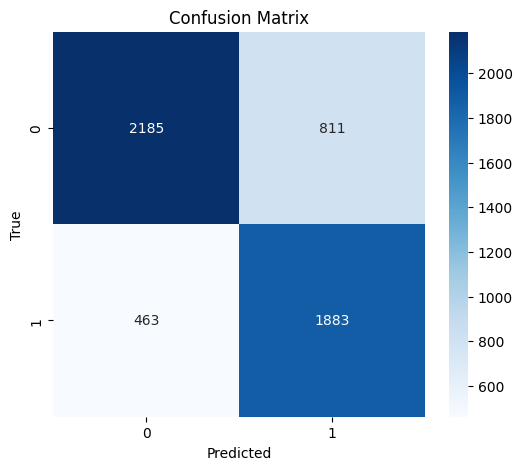

In [37]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

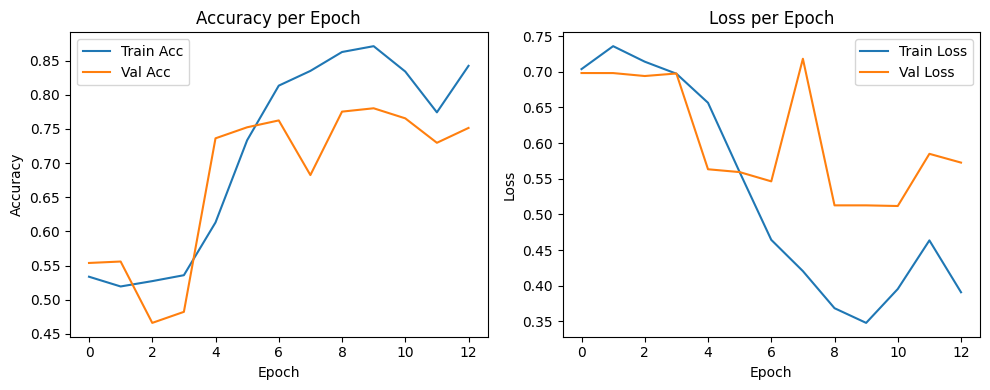

In [38]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

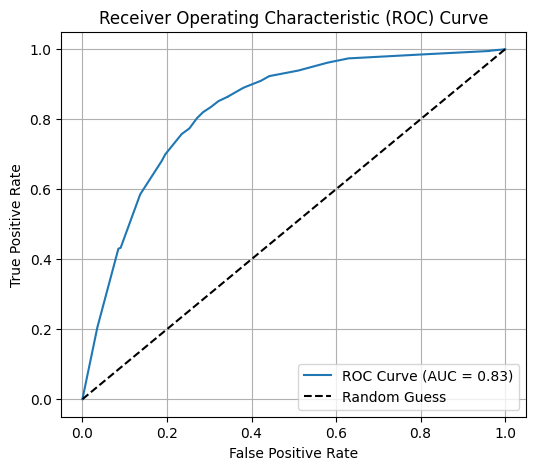

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Tensroflow LSTM

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping, ProgbarLogger

import keras_tuner as kt

In [78]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/06.%20Week%206/Datasets/DeteksiSarkasme.json"
df = pd.read_json(url, lines=True)

In [79]:
print(df.head())
print(df['is_sarcastic'].value_counts())

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  
is_sarcastic
0    14985
1    11724
Name: count, dtype: int64


In [80]:
x = df['headline'].astype(str).values
y = df['is_sarcastic'].values

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
vocab_size = 10000
maxlen = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_seq, maxlen=maxlen, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=maxlen, padding='post', truncating='post')

In [83]:
def build_model(hp):
    model = Sequential()
    model.add(Embedding(vocab_size,
                        hp.Int('emb_dim', 64, 256, 64),
                        input_length=maxlen))
    # Dua layer LSTM, pertama return_sequences=True
    model.add(Bidirectional(LSTM(
        units=hp.Int('lstm1', 64, 256, 64),
        return_sequences=True
    )))
    model.add(Bidirectional(LSTM(
        units=hp.Int('lstm2', 64, 256, 64)
    )))
    model.add(Dropout(hp.Float('drop_r', .2, .5, .1)))
    model.add(Dense(hp.Int('dense', 64, 256, 64), activation='relu'))
    model.add(Dropout(hp.Float('drop_r2', .2, .5, .1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
    return model


In [52]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='sarcasm_tuning',
    project_name='lstm_model',
    overwrite=True  # penting untuk retrain dari awal
)

In [53]:
!pip install keras
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
callbacks = [callback, ProgbarLogger()]

In [54]:
tuner.search(x_train_pad, y_train,
             epochs=10,
             validation_split=0.2,
             batch_size=128,
             callbacks=callbacks,
             verbose=1)

Trial 5 Complete [00h 00m 25s]
val_accuracy: 0.8565746545791626

Best val_accuracy So Far: 0.8614880442619324
Total elapsed time: 00h 04m 13s


In [60]:
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [61]:
y_pred_prob = best_model.predict(x_test_pad).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


In [62]:
print("\nEvaluation on Test Set:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("AUC      :", roc_auc_score(y_test, y_pred_prob))


Evaluation on Test Set:
Accuracy : 0.8487457880943466
Precision: 0.8090836012861736
Recall   : 0.8580562659846548
F1 Score : 0.8328506412908564
AUC      : 0.9307273295340078


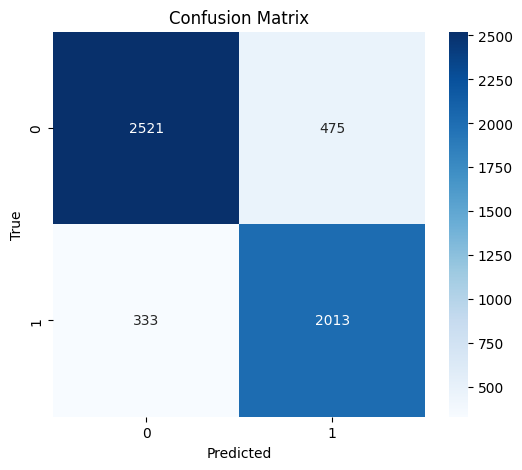

In [63]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

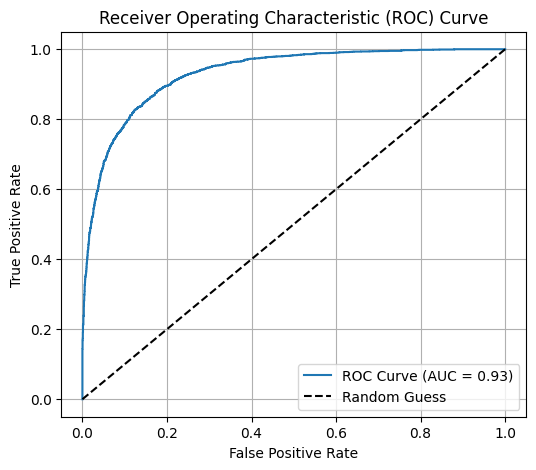

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# GRU model

In [84]:
vocab_size = 10000
maxlen = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_seq, maxlen=maxlen, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=maxlen, padding='post', truncating='post')

In [87]:
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32),
                        input_length=maxlen))

    # Gunakan Bidirectional GRU
    model.add(Bidirectional(GRU(units=hp.Int('gru_units', min_value=64, max_value=256, step=64))))

    model.add(Dropout(hp.Float('dropout_rate', 0.3, 0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        executions_per_trial=1,
                        directory='sarcasm_tuning_gru',
                        project_name='gru_model',
                        overwrite=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [88]:
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [89]:
tuner.search(x_train_pad, y_train,
             epochs=10,
             validation_split=0.2,
             batch_size=128,
             callbacks=[callback],
             verbose=1)

Trial 5 Complete [00h 00m 13s]
val_accuracy: 0.8547028303146362

Best val_accuracy So Far: 0.8589143753051758
Total elapsed time: 00h 01m 45s


In [90]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 96)        │       960,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 512)            │       543,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,520,193 (5.80 MB)

 Trainable params: 1,520,193 (5.80 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
y_train_pred_prob = best_model.predict(x_train_pad).flatten()
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [92]:
print("\nEvaluation on Train Set:")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("F1 Score :", f1_score(y_train, y_train_pred))
print("AUC      :", roc_auc_score(y_train, y_train_pred_prob))


Evaluation on Train Set:
Accuracy : 0.942762203397763
Precision: 0.9286239882266373
Recall   : 0.9419918959266368
F1 Score : 0.9352601768037689
AUC      : 0.9825508013041243


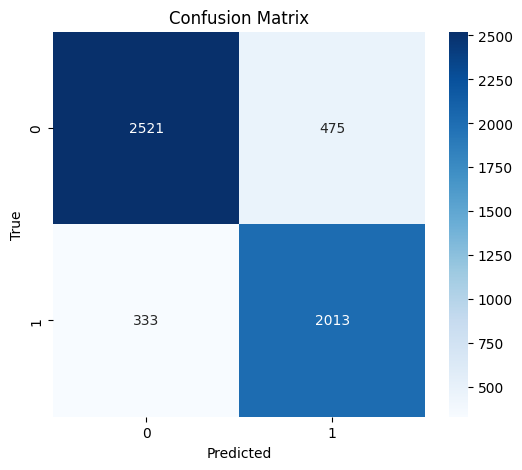

In [93]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

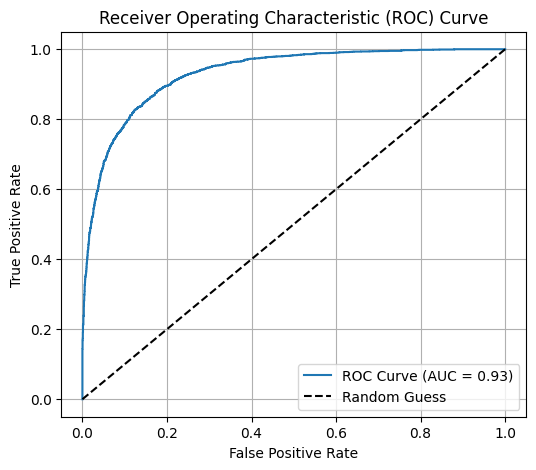

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Pytorch RNN

In [113]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [114]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/06.%20Week%206/Datasets/DeteksiSarkasme.json"
df = pd.read_json(url, lines=True)
print(df.head())
print(df['is_sarcastic'].value_counts())

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  
is_sarcastic
0    14985
1    11724
Name: count, dtype: int64


In [115]:
x = df['headline'].astype(str).values
y = df['is_sarcastic'].values

In [116]:
vocab_size = 10000
maxlen = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(x)
x_seq = tokenizer.texts_to_sequences(x)
x_pad = pad_sequences(x_seq, maxlen=maxlen, padding='post', truncating='post')

x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.2, random_state=42)

In [117]:
class SarcasmDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

train_dataset = SarcasmDataset(x_train, y_train)
test_dataset = SarcasmDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128)

In [118]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.4)
        self.fc1 = nn.Linear(hidden_dim * 2, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        _, h_n = self.rnn(x)
        h_n = torch.cat((h_n[-2,:,:], h_n[-1,:,:]), dim=1)
        x = self.dropout(h_n)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return self.sigmoid(x).squeeze()

In [119]:
model = RNNModel(vocab_size, embed_dim=64, hidden_dim=128)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1, Loss: 0.5810
Epoch 2, Loss: 0.4714
Epoch 3, Loss: 0.3977
Epoch 4, Loss: 0.3442
Epoch 5, Loss: 0.2969
Epoch 6, Loss: 0.2545
Epoch 7, Loss: 0.2176
Epoch 8, Loss: 0.1817
Epoch 9, Loss: 0.1521
Epoch 10, Loss: 0.1249


In [120]:
model.eval()
y_true, y_pred, y_probs = [], [], []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.to(device)
        outputs = model(batch_x)
        probs = outputs.cpu().numpy()
        preds = (probs > 0.5).astype(int)

        y_probs.extend(probs)
        y_pred.extend(preds)
        y_true.extend(batch_y.numpy())

print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1 Score :", f1_score(y_true, y_pred))
print("AUC      :", roc_auc_score(y_true, y_probs))

Accuracy : 0.8405091725945338
Precision: 0.81125
Recall   : 0.829923273657289
F1 Score : 0.820480404551201
AUC      : 0.9171526087070342


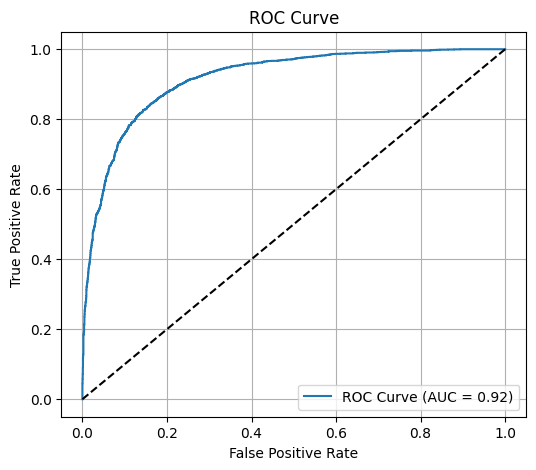

In [121]:
fpr, tpr, _ = roc_curve(y_true, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_true, y_probs):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Pytorch LSTM

In [122]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.4)
        self.fc1 = nn.Linear(hidden_dim * 2, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        _, (h_n, _) = self.lstm(x)
        h_n = torch.cat((h_n[-2,:,:], h_n[-1,:,:]), dim=1)
        x = self.dropout(h_n)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return self.sigmoid(x).squeeze()

In [123]:
model = LSTMModel(vocab_size, embed_dim=64, hidden_dim=128)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1, Loss: 0.5529
Epoch 2, Loss: 0.4137
Epoch 3, Loss: 0.3289
Epoch 4, Loss: 0.2648
Epoch 5, Loss: 0.2137
Epoch 6, Loss: 0.1615
Epoch 7, Loss: 0.1217
Epoch 8, Loss: 0.0877
Epoch 9, Loss: 0.0582
Epoch 10, Loss: 0.0457


In [124]:
model.eval()
y_true, y_pred, y_probs = [], [], []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.to(device)
        outputs = model(batch_x)
        probs = outputs.cpu().numpy()
        preds = (probs > 0.5).astype(int)

        y_probs.extend(probs)
        y_pred.extend(preds)
        y_true.extend(batch_y.numpy())

print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1 Score :", f1_score(y_true, y_pred))
print("AUC      :", roc_auc_score(y_true, y_probs))

Accuracy : 0.837701235492325
Precision: 0.8332582244254169
Recall   : 0.788150042625746
F1 Score : 0.8100766703176342
AUC      : 0.9164044528823312


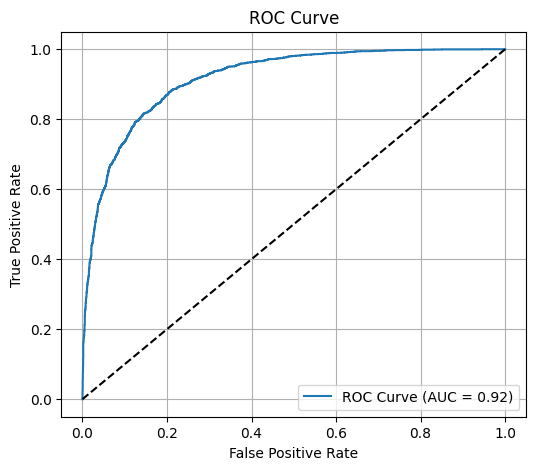

In [125]:
fpr, tpr, _ = roc_curve(y_true, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_true, y_probs):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## Pytorch GRU

In [126]:
class GRUModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.gru = nn.GRU(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.4)
        self.fc1 = nn.Linear(hidden_dim * 2, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        _, h_n = self.gru(x)
        h_n = torch.cat((h_n[-2,:,:], h_n[-1,:,:]), dim=1)
        x = self.dropout(h_n)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return self.sigmoid(x).squeeze()

In [127]:
model = GRUModel(vocab_size, embed_dim=64, hidden_dim=128)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1, Loss: 0.5584
Epoch 2, Loss: 0.4224
Epoch 3, Loss: 0.3490
Epoch 4, Loss: 0.2857
Epoch 5, Loss: 0.2324
Epoch 6, Loss: 0.1816
Epoch 7, Loss: 0.1401
Epoch 8, Loss: 0.1045
Epoch 9, Loss: 0.0731
Epoch 10, Loss: 0.0511


In [128]:
model.eval()
y_true, y_pred, y_probs = [], [], []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.to(device)
        outputs = model(batch_x)
        probs = outputs.cpu().numpy()
        preds = (probs > 0.5).astype(int)

        y_probs.extend(probs)
        y_pred.extend(preds)
        y_true.extend(batch_y.numpy())

print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1 Score :", f1_score(y_true, y_pred))
print("AUC      :", roc_auc_score(y_true, y_probs))


Accuracy : 0.8375140396855111
Precision: 0.8440409683426443
Recall   : 0.7728047740835464
F1 Score : 0.8068535825545171
AUC      : 0.9164482026048941


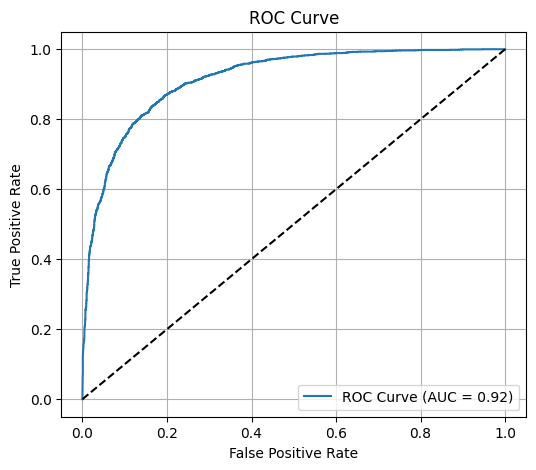

In [129]:
fpr, tpr, _ = roc_curve(y_true, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_true, y_probs):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()